### Importing Modules

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from peakutils import baseline
from scipy.integrate import trapezoid as trap
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True

## Variation of Thermodynamic Variables along z

### reading xy_aver file and grid

In [3]:
#reading the grid
grid = pc.read.grid(trim=True)
z = grid.z

reading grid data from processor 27 of 128 ...
reading grid data from processor 98 of 128 ...
reading grid data from processor 54 of 128 ...
reading grid data from processor 39 of 128 ...
reading grid data from processor 57 of 128 ...
reading grid data from processor 86 of 128 ...
reading grid data from processor 19 of 128 ...
reading grid data from processor 119 of 128 ...
reading grid data from processor 92 of 128 ...
reading grid data from processor 71 of 128 ...
reading grid data from processor 70 of 128 ...
reading grid data from processor 56 of 128 ...
reading grid data from processor 103 of 128 ...
reading grid data from processor 30 of 128 ...
reading grid data from processor 112 of 128 ...
reading grid data from processor 40 of 128 ...
reading grid data from processor 126 of 128 ...
reading grid data from processor 60 of 128 ...
reading grid data from processor 89 of 128 ...
reading grid data from processor 62 of 128 ...
reading grid data from processor 93 of 128 ...
reading g

Read 9578 lines.


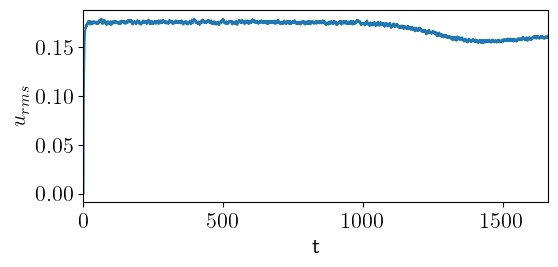

In [4]:
ts = pc.read.ts()
plt.figure(figsize=(6,2.5))
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [5]:
# plt.figure(figsize=(6,2.5))
# plt.plot(ts.t, ts.brms)
# plt.xlim(ts.t[0], ts.t[-1])
# # plt.yscale('log')
# plt.xlabel("t")
# plt.ylabel(r"$b_{rms}$")
# plt.show()

In [6]:
#reading the xy_aver file
xya=pc.read.aver(plane_list=['xy'])
rho = xya.xy.rhomz[-1,:]
pre = xya.xy.ppmz[-1,:]
tem = xya.xy.TTmz[-1,:]

### plotting 

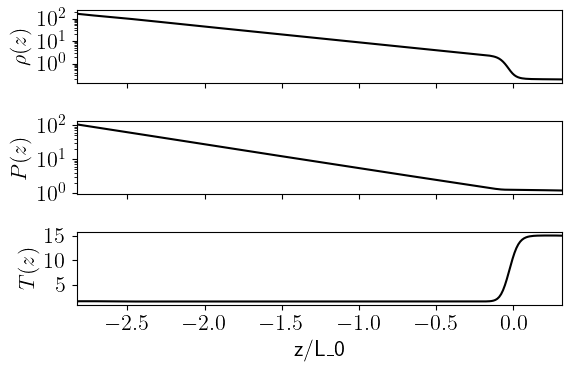

In [7]:
fig, axs = plt.subplots(3,1, figsize=(6,4), sharex=True)

axs[0].plot(grid.z, rho, color='k')
axs[1].plot(grid.z, pre, color='k')
axs[2].plot(grid.z, tem, color='k')
#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
# axs[2].set_yscale("log")

axs[2].set_xlim(z[0], z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel("z/L_0")
plt.tight_layout()
#plt.savefig("variation.jpg")

## determining the temp of the lower layer

### reading timeseries data

In [8]:
# ts = pc.read.ts()

In [9]:
def g(t, a):
    return a

i_l = np.argmin(abs(z+2.5))
j_l = np.argmin(abs(z+1.5))

z_l = z[i_l:j_l]
T_l = tem[i_l:j_l]

popt_l, pcov_l = curve_fit(g, z_l, T_l)

# z_fit_l = ts.t[i_l:j_l]
z_fit_l = z[i_l:j_l]
T_fit_l = g(z_fit_l, popt_l[0])
T_ave_l = round(np.average(T_fit_l),3)
display(Latex(fr'$T_d$ = {T_ave_l}'))
T_d = T_ave_l

<IPython.core.display.Latex object>

In [10]:
i_u = np.argmin(abs(z-0.01))
j_u = np.argmin(abs(z-0.5))

z_u = z[i_u:j_u]
T_u = tem[i_u:j_u]

popt_u, pcov_u = curve_fit(g, z_u, T_u)

z_fit_u = z[i_u:j_u]
T_fit_u = g(z_fit_u, popt_u[0])
T_ave_u = round(np.average(T_fit_u),3)
display(Latex(fr'$T_u$ = {T_ave_u}'))
T_u = T_ave_u

<IPython.core.display.Latex object>

In [11]:
q = T_ave_l/T_ave_u
display(Latex(fr'$q$ = {np.round(q,3)}'))

<IPython.core.display.Latex object>

## Calculating other parameters

In [12]:
param = pc.read.param()
cp = param.cp
display(Latex(fr'$c_p$ = {cp}'))
gamma = np.round(param.gamma, 3)
display(Latex(fr'$\gamma$ = {gamma}'))
R = np.round(cp*(1-(1/gamma)), 4)
display(Latex(fr'$R$ = {R}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
cs_d = np.round(np.sqrt(gamma*R*T_ave_l), 3)
display(Latex(fr'$c_{{sd}}$ = {cs_d}'))
cs_u = np.round(np.sqrt(gamma*R*T_ave_u), 3)
display(Latex(fr'$c_{{su}}$ = {cs_u}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
gz = 1.0
L0 = np.round(cs_d**2/gz, 3)
display(Latex(fr'$L_0$ = {L0}'))
omega0 = np.round(gz/cs_d, 3)
display(Latex(fr'$\omega_0$ = {omega0}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-200))
j2 = np.argmin(abs(ts.t-800))

t_lin = ts.t[i2:j2]
u_lin = ts.urms[i2:j2]

popt, pcov = curve_fit(g, t_lin, u_lin)

t_fit = ts.t[i2:j2]
u_fit = g(t_fit, popt[0], popt[1])
u_ave = round(np.average(u_fit),4)
display(Latex(fr'$u_{{rms}}$ = {u_ave}'))
#np.shape(i2)
#u_fit

<IPython.core.display.Latex object>

In [16]:
D = np.round(L0*u_ave/cs_d, 5)
D = np.round(L0*0.0005538/cs_d, 5)
display(Latex(fr'$D$ = {D}'))

<IPython.core.display.Latex object>

## reading poweruz_xy.dat 

In [17]:
power = pc.read.power()

poweruz_xy.dat


In [ ]:
power.t.shape

(332451,)

In [ ]:
power.t[-1]

1662.2573

### We can notice that $u_{rms}$ saturates at around $t=100$, hence we will consider $u_z(t,x,z)$ after this $t$    
Here we have taken t=100

In [ ]:
uz_real = power.uz_xy

In [ ]:
uz_real.shape

(332451, 1, 256, 66)

In [ ]:
power.t.shape, ts.t.shape

((332451,), (9578,))

In [ ]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = power.t
len(grid.x)

1024

readding the parameters

In [ ]:
param = pc.read.param()

In [ ]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.141592653589793

In [ ]:
indx_z_surf = 249    #selecting the plane to observe f-modes
# indx_t1 = np.argmin(np.abs(tt - 100))  #to avoid the transient effects below t=170
indx_t1 = -40000  #to avoid the transient effects below t=170
# indx_t1 = -10000  #to avoid the transient effects below t=170
indx_t2 = -1

### for the full data

In [ ]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.max(t_gd)-np.min(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

In [ ]:
len(t_gd)

39999

In [ ]:
t_gd

array([1462.2628, 1462.2683, 1462.272 , ..., 1662.2423, 1662.2473,
       1662.2523], dtype=float32)

shape of the data

In [ ]:
uz_real[indx_t1:indx_t2,:,:].shape

(39999, 1, 256, 66)

In [ ]:
np.shape(uz_real[indx_t1:indx_t2,:,:])

(39999, 1, 256, 66)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

### for full data

In [ ]:
# uz_fourier = np.fft.fft(uz_real[:,0,:], axis=(0), norm='forward')
uz_fourier = np.fft.fft(uz_real[indx_t1:indx_t2,0,128,:], axis=(0), norm='forward')
uz_fourier = np.fft.fftshift(uz_fourier, axes=(0))
# uz_fourier = uz_real[indx_t1:indx_t2,0,:]

In [ ]:
uz_fourier.shape

(39999, 66)

### we can construct the dimensionless quantity 
$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$

In [ ]:
logP = np.log(np.abs(uz_fourier/D**2))

### defining $\tilde{k}_x=k_xL_0, \hspace{2mm} \tilde{\omega}=\frac{\omega}{\omega_0}$

In [ ]:
T = t_gd.shape[0]

In [ ]:
np.shape(t_gd)

(39999,)

In [ ]:
dom

0.03141757565180739

In [ ]:
np.arange(0, T/2)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9997e+04, 1.9998e+04,
       1.9999e+04])

In [ ]:
if T%2 == 0:
    fom = np.arange(0, T/2)
    rom = -np.flip(np.arange(1, T/2+1))
    om = np.concatenate((rom, fom))*dom
else:
    fom = np.arange(0, T/2)
    rom = -np.flip(np.arange(1, T/2))
    om = np.concatenate((rom, fom))*dom

In [ ]:
om

array([-628.32009546, -628.28867788, -628.25726031, ...,  628.25726031,
        628.28867788,  628.32009546])

In [ ]:
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx
# else:
#     fnx = np.arange(0, nx/2+1)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx

In [ ]:
# om.shape, kx.shape 

In [ ]:
kx = power.kx

In [ ]:
kx*L0

array([ 0.      ,  0.169672,  0.338328,  0.508   ,  0.677672,  0.846328,
        1.016   ,  1.18872 ,  1.35128 ,  1.524   ,  1.69672 ,  1.85928 ,
        2.032   ,  2.20472 ,  2.36728 ,  2.54    ,  2.71272 ,  2.87528 ,
        3.048   ,  3.22072 ,  3.38328 ,  3.556   ,  3.72872 ,  3.89128 ,
        4.064   ,  4.23672 ,  4.39928 ,  4.572   ,  4.74472 ,  4.90728 ,
        5.08    ,  5.25272 ,  5.41528 ,  5.588   ,  5.76072 ,  5.92328 ,
        6.096   ,  6.26872 ,  6.43128 ,  6.604   ,  6.77672 ,  6.93928 ,
        7.112   ,  7.28472 ,  7.44728 ,  7.62    ,  7.79272 ,  7.95528 ,
        8.128   ,  8.30072 ,  8.46328 ,  8.636   ,  8.80872 ,  8.97128 ,
        9.144   ,  9.31672 ,  9.47928 ,  9.652   ,  9.82472 ,  9.98728 ,
       10.16    , 10.3632  , 10.4648  , 10.668   , 10.8712  , 10.9728  ])

In [ ]:
om

array([-628.32009546, -628.28867788, -628.25726031, ...,  628.25726031,
        628.28867788,  628.32009546])

In [ ]:
x = grid.x

In [ ]:
x[0]

-18.831148

In [ ]:
max(x) - min(x)

37.662296

In [ ]:
np.shape(uz_fourier)

(39999, 66)

In [ ]:
n_omega, n_kx = np.shape(uz_fourier[:,:])

omega = 2*np.pi*np.arange(np.ceil(-n_omega/2), np.ceil(n_omega/2))/(max(t_gd) - min(t_gd))
kx = 2*np.pi*np.arange(0,n_kx)/(max(x) - min(x))

In [ ]:
2*np.pi/(max(t_gd) - min(t_gd))

0.03141757565180739

In [ ]:
np.ceil(-n_omega/2)*0.03141


-628.16859

In [ ]:
np.diff(omega)

array([0.03141758, 0.03141758, 0.03141758, ..., 0.03141758, 0.03141758,
       0.03141758])

In [ ]:
n_omega

39999

In [ ]:
omega

array([-628.32009546, -628.28867788, -628.25726031, ...,  628.25726031,
        628.28867788,  628.32009546])

In [ ]:
kx*L0

array([ 0.        ,  0.16949886,  0.33899772,  0.50849658,  0.67799544,
        0.8474943 ,  1.01699316,  1.18649202,  1.35599088,  1.52548974,
        1.6949886 ,  1.86448746,  2.03398632,  2.20348517,  2.37298403,
        2.54248289,  2.71198175,  2.88148061,  3.05097947,  3.22047833,
        3.38997719,  3.55947605,  3.72897491,  3.89847377,  4.06797263,
        4.23747149,  4.40697035,  4.57646921,  4.74596807,  4.91546693,
        5.08496579,  5.25446465,  5.42396351,  5.59346237,  5.76296123,
        5.93246009,  6.10195895,  6.27145781,  6.44095666,  6.61045552,
        6.77995438,  6.94945324,  7.1189521 ,  7.28845096,  7.45794982,
        7.62744868,  7.79694754,  7.9664464 ,  8.13594526,  8.30544412,
        8.47494298,  8.64444184,  8.8139407 ,  8.98343956,  9.15293842,
        9.32243728,  9.49193614,  9.661435  ,  9.83093386, 10.00043272,
       10.16993158, 10.33943044, 10.5089293 , 10.67842816, 10.84792701,
       11.01742587])

In [ ]:
# om_tilde

In [ ]:
k_tilde = kx*L0
# om_tilde = np.fft.fftshift(om/omega0)
om_tilde = omega/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((39999,), (66,), (39999, 66))

### plotting $\tilde{k}_x-\tilde{\omega}$ diagram

In [ ]:
k_tilde

array([ 0.        ,  0.16949886,  0.33899772,  0.50849658,  0.67799544,
        0.8474943 ,  1.01699316,  1.18649202,  1.35599088,  1.52548974,
        1.6949886 ,  1.86448746,  2.03398632,  2.20348517,  2.37298403,
        2.54248289,  2.71198175,  2.88148061,  3.05097947,  3.22047833,
        3.38997719,  3.55947605,  3.72897491,  3.89847377,  4.06797263,
        4.23747149,  4.40697035,  4.57646921,  4.74596807,  4.91546693,
        5.08496579,  5.25446465,  5.42396351,  5.59346237,  5.76296123,
        5.93246009,  6.10195895,  6.27145781,  6.44095666,  6.61045552,
        6.77995438,  6.94945324,  7.1189521 ,  7.28845096,  7.45794982,
        7.62744868,  7.79694754,  7.9664464 ,  8.13594526,  8.30544412,
        8.47494298,  8.64444184,  8.8139407 ,  8.98343956,  9.15293842,
        9.32243728,  9.49193614,  9.661435  ,  9.83093386, 10.00043272,
       10.16993158, 10.33943044, 10.5089293 , 10.67842816, 10.84792701,
       11.01742587])

In [ ]:
om_tilde

array([-633.387193  , -633.35552206, -633.32385112, ...,  633.32385112,
        633.35552206,  633.387193  ])

In [ ]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(X, np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r')#, vmin=4, vmax=np.max(logP))
# plt.contourf(X, Y, logP, 4000, cmap='afmhot_r')#, vmin=4, vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), 'k')
# # plt.plot(aa, np.sqrt(grz*aa*(1-q)/(1+q)), ls='dotted', c='k')
# # plt.plot(k_tilde, cs_d*k_tilde, 'k')
# # plt.plot(k_tilde, cs_u*k_tilde, 'k')
# # plt.axvline(x=k_tilde[1], c='r')
# # plt.axvline(x=k_tilde[2], c='g')
# # plt.axvline(x=k_tilde[3], c='b')
# # plt.axvline(x=k_tilde[4], c='c')
# # plt.xlim(-2*np.pi,2*np.pi)
# # plt.ylim(-2*np.pi,2*np.pi)
# # plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('k_om.png')
# # plt.show()

In [ ]:
omega0, L0

(0.992, 1.016)

In [ ]:
def pmodes(kx, n: int):
        """
        Calculate the freq of p-mode.
        n: order of p-modes, 0, 1, 2, 3, ...
        """
        om_sq = gz**2/(2*cs_d)**2+cs_d**2*((kx/L0)**2+((n+0.5)*np.pi/(9*lz/10))**2)
        freq = np.sqrt(om_sq/omega0**2)
        return np.round(freq, 3)

(0.0, 16.28928758)

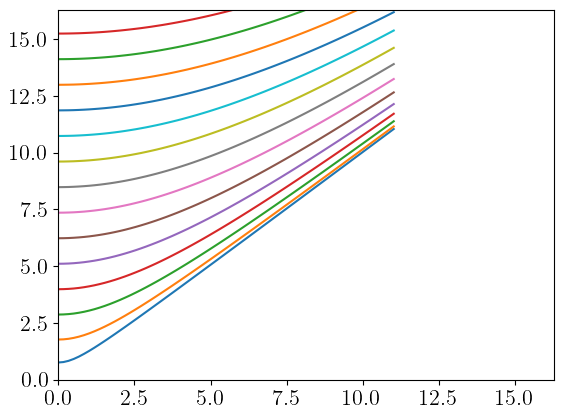

In [ ]:
for i in range(0, 16):
    plt.plot(k_tilde, pmodes(k_tilde, i))
plt.xlim(0,16.28928758)
plt.ylim(0,16.28928758)

In [ ]:
q = np.round(T_d/T_u, 3)
q

0.105

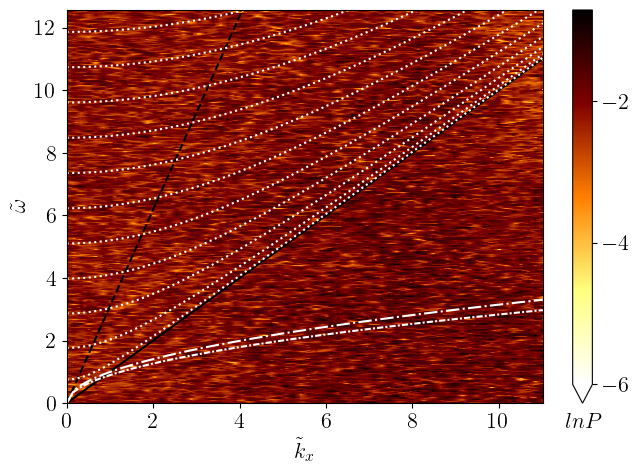

In [ ]:
vmin = -6; vmax = np.max(logP)
levels = np.linspace(vmin, vmax, 1000)
[X, Y] = np.meshgrid(k_tilde, om_tilde)
import matplotlib.colors as colors
fig, ax = plt.subplots(1, figsize=(7,5))
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
diag = ax.contourf(X, Y, logP, 4000, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# plt.contourf(X, Y, logP, 4000, cmap='afmhot_r', norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
#                                               vmin=-3, vmax=logP.max(), base=10))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k')
plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k')
plt.plot(k_tilde, np.sqrt(gz*k_tilde/(omega0*L0)), ls='-.', c='w')
plt.plot(k_tilde, np.sqrt(gz*k_tilde*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
for i in range(0, 16):
    plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')
# plt.axvline(x=2, c='k')
# plt.xlim(0,2*np.pi)
plt.ylim(0,4*np.pi)
# plt.ylim(0,16.28928758)
cbar = fig.colorbar(diag, cax=None, ax=ax)
ticks = np.arange(vmin, vmax, 2)
cbar.set_ticks(ticks)
cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.tight_layout()
# plt.savefig('plots/k_om.png')
plt.show()

In [ ]:
# vmin = -4; vmax = np.max(logP)
# levels = np.linspace(vmin, vmax, 1000)
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# import matplotlib.colors as colors
# fig, ax = plt.subplots(1, figsize=(7,5))
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# diag = ax.contourf(X, Y, logP, 4000, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# 
# # plt.axvline(x=2, c='k')
# # plt.xlim(0,2*np.pi)
# # plt.ylim(0,np.pi)
# plt.ylim(0,0.62894752)
# cbar = fig.colorbar(diag, cax=None, ax=ax)
# ticks = np.arange(vmin, vmax, 2)
# cbar.set_ticks(ticks)
# cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# # plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.tight_layout()
# # plt.savefig('plots/k_om.png')
# plt.show()

In [ ]:
yaver = pc.read.aver(plane_list=['y'])

MemoryError: Unable to allocate 30.6 GiB for an array with shape (6684, 4, 300, 1024) and data type float32

In [ ]:
yaver.y.t[-1]

6632.0015

In [ ]:
yaver.y.t[500]

250.00063

In [ ]:
uz_xz = yaver.y.uzmxz
u_dim = uz_xz.shape

In [ ]:
uz_xz.shape

(13265, 1024, 300)

In [ ]:
np.diff(yaver.y.t)[0]

0.5019426

In [ ]:
# indx_nyq = np.argmin(np.abs(om))


In [ ]:
# indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(z[0], z[-1], 300)
# uz_f_z =  np.empty([np.shape(uz_xz[:,0,1])[0], np.shape(uz_xz[:,0,1])[1], len(indx_z)], dtype=complex)
uz_f_z =  np.empty([u_dim[0], u_dim[1], len(indx_z)], dtype=complex)


for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_xz[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    # exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_xz[:,0,{i}], s=None, axes=(-2, -1), norm=None)')
    uz_f_z[:,:,i] = np.fft.fftn(uz_xz[:,:,i], s=None, axes=(0, 1), norm='forward')

In [ ]:
# logP_z = np.fft.fftshift(np.log(np.abs(uz_f_z/D**2)), axes=(-2,-1))
logP_z = np.fft.fftshift(np.log(np.abs(uz_f_z/D**2)), axes=(0,1))

/tmp/ipykernel_1914888/3192903652.py:2: RuntimeWarning:

divide by zero encountered in log



In [ ]:
np.argmin(np.abs(indx_z-0))

249

In [ ]:
t_gd.shape

(39999,)

In [ ]:
t_gd[-1]-t_gd[0]

199.98975

In [ ]:
t_gd_y = yaver.y.t[200:]  #time interval where urms has reached a steady state
# t_len = np.size(t_gd)

# dkx = 2*np.pi/lx    #unit step along kx direction
# dom = 2*np.pi/t_len #unit step alomg omega direction

In [ ]:
n_omega_y, n_kx, _ = np.shape(uz_f_z[200:,:,:])

omega_y = 2*np.pi*np.arange(np.ceil(-n_omega_y/2), np.ceil(n_omega_y/2))/(max(t_gd_y) - min(t_gd_y))
# kx = 2*np.pi*np.arange(0,n_kx)/(max(x) - min(x))
kx = 2*np.pi*np.arange(np.ceil(-n_kx/2), np.ceil(n_kx/2))/(max(x) - min(x))

In [ ]:
nyq_freq = np.pi/np.diff(t_gd_y)[0]
print(nyq_freq)

6.287598599653708


In [ ]:
n_omega_y

13065

In [ ]:
omega_y[-1]

6.283185307179586

In [ ]:
max(t_gd_y)-min(t_gd_y)

6532.0

In [ ]:
2*np.pi*n_omega_y/(max(t_gd_y) - min(t_gd_y))

12.56733252270381

In [ ]:
k_til = kx*L0
om_til = omega_y/omega0

In [ ]:
om_til

array([-6.28947478, -6.28851191, -6.28754904, ...,  6.28754904,
        6.28851191,  6.28947478])

In [ ]:
k_til

array([-128.38137897, -128.13063409, -127.8798892 , ...,  127.62914432,
        127.8798892 ,  128.13063409])

In [ ]:
[X, Y] = np.meshgrid(k_til, om_til)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(X, Y, logP_z[200:,:,124], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# plt.contourf(logP_z[:,:,124], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')

# plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k')
# plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k')
# plt.plot(k_tilde, np.sqrt(gz*k_tilde/(omega0*L0)), ls='-.', c='w')
# plt.plot(k_tilde, np.sqrt(gz*k_tilde*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
# for i in range(0, 16):
#     plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')

# # plt.axvline(x=2, c='k')
plt.xlim(-16,16)
# # plt.ylim(0,np.max(logP_z))
# plt.ylim(0,np.max(om_til))
# plt.xlim(0,16.28928758)
# plt.ylim(0,16.28928758)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.tight_layout()
plt.savefig('plots/k_om.png')
plt.show()

Locator attempting to generate 3148 ticks ([-19.112000000000002, ..., 6.064]), which exceeds Locator.MAXTICKS (1000).
